In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import glob

In [3]:
all_files = glob.glob('EVCS_15_results.db')
print(all_files)

storage = pd.DataFrame()

for filename in glob.glob('EVCS_15_results.db'):
    con = sqlite3.connect(filename)
    
    grid_power = pd.read_sql_query("SELECT * FROM var_grid_power", con)
    grid_extra_power = pd.read_sql_query("SELECT * FROM var_grid_ex_power", con)
    grid_total_power = pd.read_sql_query("SELECT * FROM var_grid_total_power", con)
    
    grid_energy = pd.read_sql_query("SELECT * FROM var_grid_energy", con)
    grid_extra_energy = pd.read_sql_query("SELECT * FROM var_grid_ex_energy", con)
    
    ESS_level = pd.read_sql_query('SELECT * FROM var_ESS_level', con)
    ESS_power = pd.read_sql_query('SELECT * FROM var_ESS_power', con)
    
    SOC_pen = pd.read_sql_query('SELECT * FROM var_SOC_pen', con)

    scalars = pd.read_sql_query('SELECT * FROM scalarvariables', con)
    

    
    
    con.close()


# Demand
demand = pd.read_csv('demand_analysis.tsv', sep = ',')

['EVCS_15_results.db']


In [4]:
sclrs = scalars.filter(['name', 'level'])

In [5]:
sclrs

,name,level
0,var_ess_rated_power,173.968750
1,var_grid_maxpower1,222.591250
2,var_grid_maxpower2,264.807500
3,var_grid_maxpower3,180.000000
4,var_grid_maxpower4,225.501250
5,var_ESS_cost,30618.500000
6,var_electricity_cost,141094.161756
7,var_grid_tariff_winter,70553.808901
8,var_energy_tax,3602.265477
9,months,4.283482


In [6]:
demand['All'] = demand['C1'] + demand['C2'] + demand['C3'] + demand['C4'] + demand['C5'] + demand['C6'] + demand['C7'] + demand['C8']
demand

,DateTime,C3,C4,C5,C6,C7,C8,C1,C2,All
0,2021-11-01 00:00:00,0.0,0.0,0,0,0,0,0.0,0.0,0.0
1,2021-11-01 00:05:00,0.0,0.0,0,0,0,0,0.0,0.0,0.0
2,2021-11-01 00:10:00,0.0,0.0,0,0,0,0,0.0,0.0,0.0
3,2021-11-01 00:15:00,0.0,0.0,0,0,0,0,0.0,0.0,0.0
4,2021-11-01 00:20:00,0.0,0.0,0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
34537,2022-02-28 23:35:00,0.0,0.0,0,0,0,0,0.0,0.0,0.0
34538,2022-02-28 23:40:00,0.0,0.0,0,0,0,0,0.0,0.0,0.0
34539,2022-02-28 23:45:00,0.0,0.0,0,0,0,0,0.0,0.0,0.0
34540,2022-02-28 23:50:00,0.0,0.0,0,0,0,0,0.0,0.0,0.0


In [115]:
system_cost = sclrs.loc[10]['level']
ESS_cost = sclrs.loc[5]['level']
electricity_cost = sclrs.loc[6]['level']
grid_tariff = sclrs.loc[7]['level']
energy_tax = sclrs.loc[8]['level']

In [116]:
grid_limit_power = grid_power['level']
grid_ex_power = grid_extra_power['level']
grid_tot_power = grid_total_power['level']

grid_total_energy = grid_energy['level']
grid_ex_energy = grid_extra_energy['level']

ess_energy = ESS_level['level']
ess_power = ESS_power['level']

soc_pen = sum(SOC_pen['level'])
system_cost1 = system_cost - soc_pen

Text(0.5, 1.0, 'Cost Distribution')

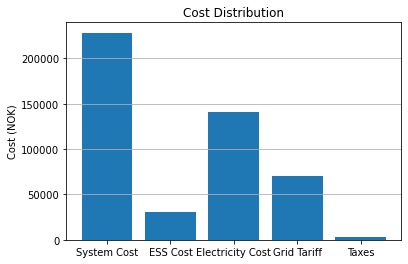

In [117]:
labels = ['System Cost', 'ESS Cost', 'Electricity Cost', 'Grid Tariff', 'Taxes']
costs = [system_cost1, ESS_cost, electricity_cost, grid_tariff, energy_tax]

plt.bar(labels, costs)
plt.ylabel('Cost (NOK)')
plt.grid(axis = 'y')
plt.title('Cost Distribution')

In [118]:
print(system_cost1)

228439.3720515051


In [51]:
soc = ess_energy.tolist()
SOC = []

for i in range(len(soc)):
    SOC.append(soc[i] * 100 / 173.968750)


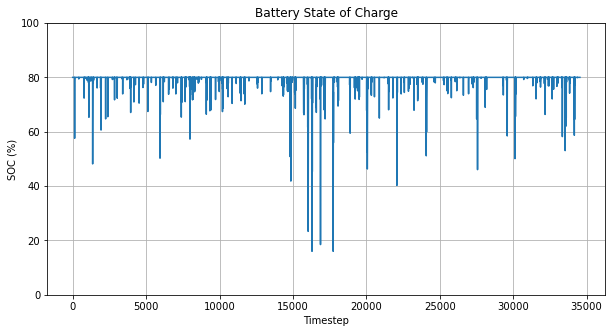

In [52]:
plt.figure(figsize = (10,5))
plt.plot(SOC)
plt.ylim(0, 100)
plt.ylabel('SOC (%)')
plt.xlabel('Timestep')
plt.title('Battery State of Charge')
plt.grid()

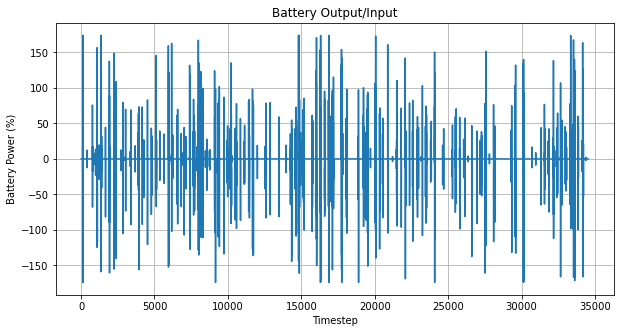

In [54]:
plt.figure(figsize = (10,5))
plt.plot(ess_power)

plt.ylabel('Battery Power (%)')
plt.xlabel('Timestep')
plt.title('Battery Output/Input')
plt.grid()

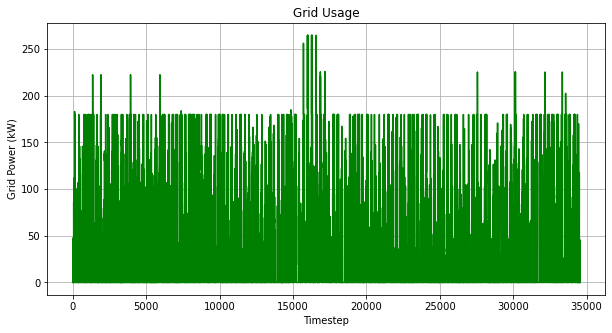

In [55]:
plt.figure(figsize = (10,5))
plt.plot(grid_tot_power, color = 'g')
plt.ylabel('Grid Power (kW)')
plt.xlabel('Timestep')
plt.title('Grid Usage')
plt.grid()

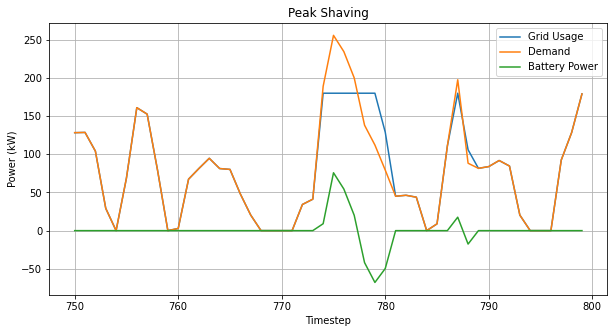

In [56]:
dem = demand['All']
plt.figure(figsize = (10,5))
plt.plot(grid_tot_power.iloc[750:800], label = 'Grid Usage')
plt.plot(dem.iloc[750:800], label = 'Demand')
plt.plot(ess_power.iloc[750:800], label = 'Battery Power')
plt.legend()
plt.ylabel('Power (kW)')
plt.xlabel('Timestep')
plt.title('Peak Shaving')
plt.grid()

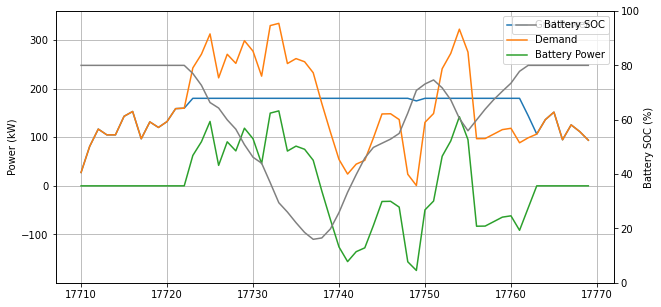

In [57]:
x = range(17710,17770)

fig, ax1 = plt.subplots(figsize = (10,5))
ax2 = ax1.twinx()

ax1.plot(x, grid_tot_power.iloc[17710:17770], label = 'Grid Power')
ax1.plot(x, dem.iloc[17710:17770], label = 'Demand')
ax1.plot(x, ess_power[17710:17770], label = 'Battery Power')
ax1.legend()
ax1.grid()
ax1.set_ylabel('Power (kW)')

ax2.plot(x, SOC[17710:17770], label = 'Battery SOC', color = 'grey')
ax2.set_ylim(0,100)
ax2.set_ylabel('Battery SOC (%)')

ax2.legend()


In [58]:
df = pd.DataFrame()
df['DateTime'] = pd.to_datetime(demand['DateTime'])
df['Grid Power kW'] = grid_power['level']
df['Grid Extra Power kW'] = grid_extra_power['level']
df['Total Grid Power kW'] = grid_total_power['level']
df['Grid Energy kWh'] = grid_energy['level']
df['Grid Extra Energy kWh'] = grid_extra_energy['level']
df['ESS Level kWh']= ESS_level['level']
df['ESS Power kW'] = ESS_power['level']
df['ESS SOC %'] = np.array(SOC)
df['Demand kW'] = dem
#df.set_index('DateTime')
df

,DateTime,Grid Power kW,Grid Extra Power kW,Total Grid Power kW,Grid Energy kWh,Grid Extra Energy kWh,ESS Level kWh,ESS Power kW,ESS SOC %,Demand kW
0,2021-11-01 00:00:00,0.0,0.0,0.0,0.0,0.0,139.175,0.0,80.0,0.0
1,2021-11-01 00:05:00,0.0,0.0,0.0,0.0,0.0,139.175,0.0,80.0,0.0
2,2021-11-01 00:10:00,0.0,0.0,0.0,0.0,0.0,139.175,0.0,80.0,0.0
3,2021-11-01 00:15:00,0.0,0.0,0.0,0.0,0.0,139.175,0.0,80.0,0.0
4,2021-11-01 00:20:00,0.0,0.0,0.0,0.0,0.0,139.175,0.0,80.0,0.0
...,...,...,...,...,...,...,...,...,...,...
34537,2022-02-28 23:35:00,0.0,0.0,0.0,0.0,0.0,139.175,0.0,80.0,0.0
34538,2022-02-28 23:40:00,0.0,0.0,0.0,0.0,0.0,139.175,0.0,80.0,0.0
34539,2022-02-28 23:45:00,0.0,0.0,0.0,0.0,0.0,139.175,0.0,80.0,0.0
34540,2022-02-28 23:50:00,0.0,0.0,0.0,0.0,0.0,139.175,0.0,80.0,0.0


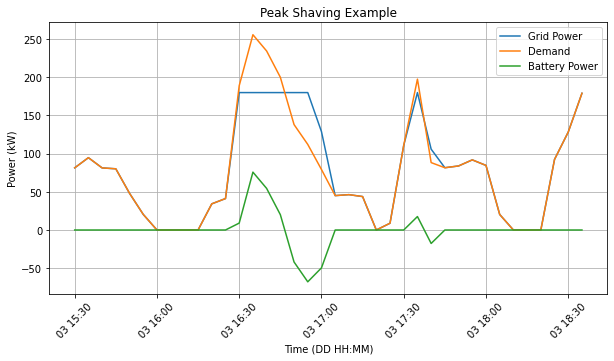

In [77]:
plt.figure(figsize = (10,5))
x = df['DateTime'].iloc[762:800]
g = df['Total Grid Power kW'].iloc[762:800]
d = df['Demand kW'].iloc[762:800]
b = df['ESS Power kW'].iloc[762:800] 

plt.plot(x,g, label = 'Grid Power')
plt.plot(x,d, label = 'Demand')
plt.plot(x,b, label = 'Battery Power')
plt.plot()
plt.xticks(rotation = 45)
plt.legend()
plt.ylabel('Power (kW)')
plt.xlabel('Time (DD HH:MM)')
plt.title('Peak Shaving Example')
plt.grid()

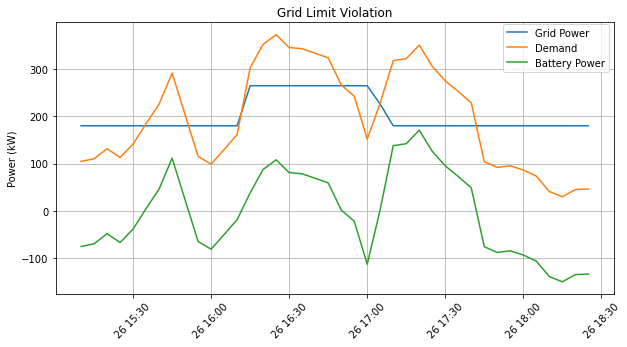

In [110]:
x = df['DateTime'].iloc[16005:16045]
g = df['Total Grid Power kW'].iloc[16005:16045]
d = df['Demand kW'].iloc[16005:16045]
b = df['ESS Power kW'].iloc[16005:16045]
s = df['ESS SOC %'].iloc[16005:16045]

fig, ax1 = plt.subplots(figsize = (10,5))
#ax2 = ax1.twinx()
#ax1.set_xticklabels(ax1.get_xticks(), rotation = 45)
ax1.tick_params(axis='x', labelrotation = 45)

ax1.plot(x, g, label = 'Grid Power')
ax1.plot(x, d, label = 'Demand')
ax1.plot(x, b, label = 'Battery Power')
ax1.grid()
ax1.set_ylabel('Power (kW)')
ax1.set_title('Grid Limit Violation')

#ax2.plot(x, s, label = 'Battery SOC', color = 'grey')
#ax2.set_ylim(0,100)
#ax2.set_ylabel('Battery SOC (%)')

fig.legend(loc='upper right', bbox_to_anchor=(0.5, 0.39, 0.40, 0.5))

Text(0.5, 0, 'Date (YYYY-MM-DD)')

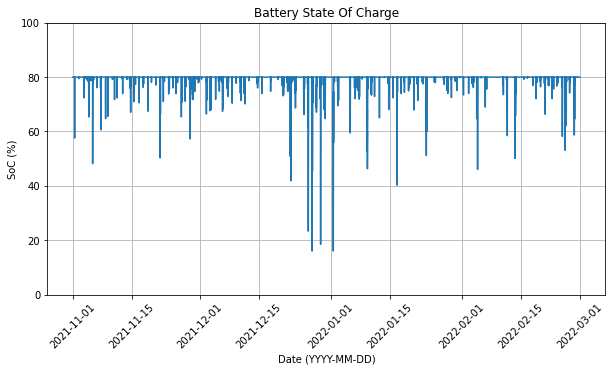

In [68]:
x = df['DateTime']
y = df['ESS SOC %']

plt.figure(figsize = (10,5))
plt.plot(x,y)
plt.ylim(0,100)
plt.xticks(rotation = 45)
plt.title('Battery State Of Charge')
plt.ylabel('SoC (%)')
plt.grid()
plt.xlabel('Date (YYYY-MM-DD)')

In [69]:
print(y.min())

15.999999999999998


In [73]:
power = df['ESS Power kW']
cycles = []

for i in range(len(power)):
    if i <= 3:
        pass
    elif power[i-1] > 0 and power[i] < 0:
        cycles.append(1)
    else:
        pass
    
print(len(cycles))

378


In [74]:
soc = df['ESS SOC %']
t = []

for i in range(len(soc)):
    if i <= 3:
        pass
    elif soc[i-1] < 60 and soc[i] >= 60:
        t.append(1)
    else:
        pass

print(len(t))

26


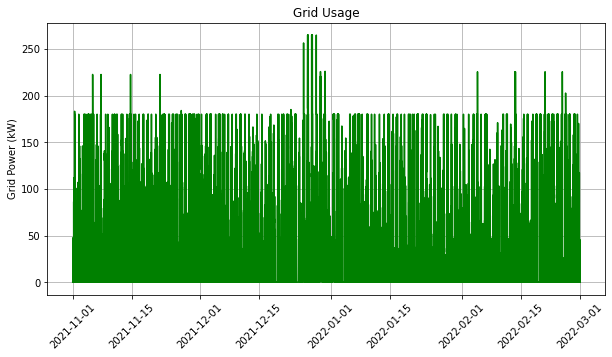

In [63]:
x = df['DateTime']
y = df['Total Grid Power kW']

plt.figure(figsize = (10,5))
plt.plot(x,y, color = 'g')
plt.ylabel('Grid Power (kW)')
plt.title('Grid Usage')
plt.xticks(rotation = 45)
plt.grid()

<ipython-input-64-072db74e6948>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xticks(Rotation = 45)


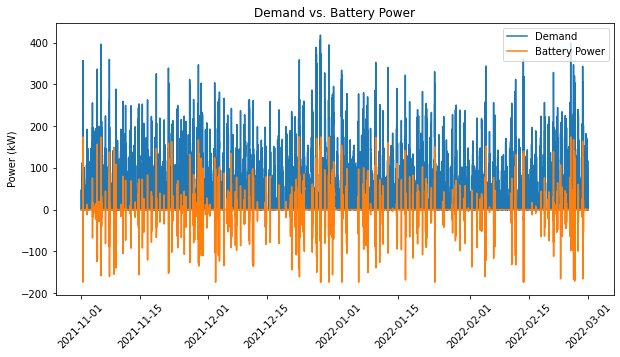

In [64]:
x = df['DateTime']
y = df['ESS Power kW']
d = df['Demand kW']

plt.figure(figsize = (10,5))
plt.plot(x,d, label = 'Demand')
plt.plot(x,y, label = 'Battery Power')
plt.ylabel('Power (kW)')
plt.xticks(Rotation = 45)
plt.title('Demand vs. Battery Power')
plt.legend()


Text(0.5, 1.0, 'Cost Distribution')

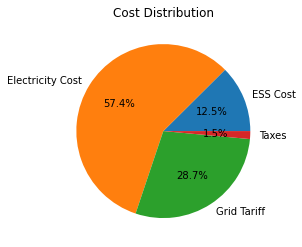

In [119]:
labels = [ 'ESS Cost', 'Electricity Cost', 'Grid Tariff', 'Taxes']
costs = [ ESS_cost, electricity_cost, grid_tariff, energy_tax]

plt.pie(costs, labels = labels, autopct='%1.1f%%')
plt.grid(axis = 'y')
plt.title('Cost Distribution')

In [7]:
dem = demand['All']
high = []
low = []


for i in range(len(dem)):
    if dem[i] > 100:
        low.append(1)
    if dem[i] > 300:
        high.append(1)
    else:
        pass

In [8]:
len(low)

3951

In [9]:
len(high)

105